In [1]:
#importing libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('DigitalAd_dataset.csv')

In [3]:
'''summarize dataset'''
print("Dataset shape is: ",dataset.shape)
dataset.head(5)

Dataset shape is:  (400, 3)


,Age,Salary,Status
0,18,82000,0
1,29,80000,0
2,47,25000,1
3,45,26000,1
4,46,28000,1


In [4]:
'''Segregate Dataset into X(Indep var/ip) & Y(Dependent var/op)'''
x=dataset.iloc[:,:-1].values
x

array([[    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],
       [    27,  17000],
       [    33,  51000],
       [    35, 108000],
       [    30,  15000],
       [    28,  84000],
       [    23,  20000],
       [    25,  79000],
       [    27,  54000],
       [    30, 135000],
       [    31,  89000],
       [    24,  32000],
       [    18,  44000],
       [    29,  83000],
       [    35,  23000],


In [5]:
y=dataset.iloc[:,-1].values
y

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,

In [6]:
#splitting Dataset into Train and Test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

FEATURE SCALING


In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train) #fit_tranform->calculating mean and variance for each features present in our data
x_test=sc.transform(x_test)#transforms all features using respective mean and variance

In [8]:
'''TRAINING'''
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [9]:
'''Predicting whether new customet with Age and Salary will buy or not'''
age=int(input("Enter new Customer's age: "))
sal=int(input("Enter new Customer's salary: "))
newCust=[[age,sal]]
result=model.predict(sc.transform(newCust))
print(result)
if result==1:
    print("The Customer will buy")
else:
    print("The Customer won't buy")

Enter new Customer's age: 45
Enter new Customer's salary: 75000
[1]
The Customer will buy


In [10]:
'''predict for all test data'''
y_pred=model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


In [11]:
'''Validation method --> Confusion matrix(Accuracy=(TP+TN)/(TP+TN+FP+FN))'''
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)

print("Confusion matrix: ")
print(cm)

print("Accuracy of the model: {0}%".format(accuracy_score(y_test,y_pred)*100))


Confusion matrix: 
[[61  0]
 [20 19]]
Accuracy of the model: 80.0%


No Skill:ROC AUC=50.000
Logistic Skill:ROC AUC=92.980


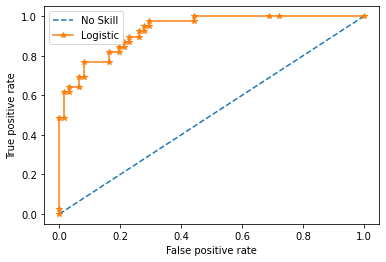

In [12]:
'''RECEIVER OPERATING CURVE-ROC CURVE'''
from sklearn.metrics import roc_auc_score,roc_curve
nsProbability=[0 for _ in range(len(y_test))] #nrml linear line(no skill)
lsProbability=model.predict_proba(x_test) #logistic regression curve

#TO KEEP PROBABILITIES FOR POSITIVE OUTCOME ONLY
lsProbability=lsProbability[:,1]

#calculate scores
nsAUC=roc_auc_score(y_test,nsProbability)
lrAUC=roc_auc_score(y_test,lsProbability)

#SUMMARIZE SCORES
print('No Skill:ROC AUC=%.3f' %(nsAUC*100))
print('Logistic Skill:ROC AUC=%.3f' %(lrAUC*100))

#calculate roc curves
nsFP,nsTP,_=roc_curve(y_test,nsProbability)
lrFP,lrTP,_=roc_curve(y_test,lsProbability)

#plot the roc curve for the model
plt.plot(nsFP,nsTP,linestyle='--',label='No Skill')
plt.plot(lrFP,lrTP,marker='*',label='Logistic')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

#show legend
plt.legend()
plt.show()

In [13]:
'''CROSS VALIDATION SCORE'''
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=None)
result = cross_val_score(model, x, y, cv=kfold)
print("CROSS VALIDATION SCORE: %.2f%%" % (result.mean()*100.0))

CROSS VALIDATION SCORE: 64.25%


In [14]:
'''STRATIFY VALIDATION SCORE'''
from sklearn.model_selection import StratifiedKFold,cross_val_score
skfold=StratifiedKFold(n_splits=3,random_state=None)
model_skfold=LogisticRegression()
results_skfold=cross_val_score(model_skfold, x, y, cv=skfold)
print("STRATIFY VALIDATION SCORE: %.2f%%" % (results_skfold.mean()*100.0))

STRATIFY VALIDATION SCORE: 64.50%


100
39


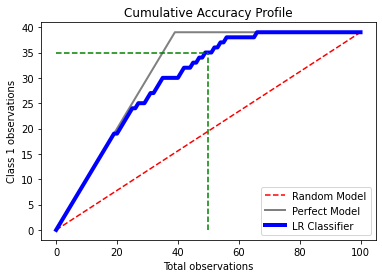

In [15]:
'''CAP(Cumulative Accuracy Profile) CURVE'''
total = len(y_test)
print(total)
class_1_count = np.sum(y_test)
print(class_1_count)
class_0_count = total - class_1_count
plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')

plt.plot([0, class_1_count, total], 
         [0, class_1_count, class_1_count], 
         c = 'grey', 
         linewidth = 2, 
         label = 'Perfect Model')

probs = model.predict_proba(x_test)
probs = probs[:, 1]
model_y = [y for _, y in sorted(zip(probs, y_test), reverse = True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total + 1)

plt.plot(x_values, 
         y_values, 
         c = 'b', 
         label = 'LR Classifier', 
         linewidth = 4)

index = int((50*total / 100))

## 50% Verticcal line from x-axis
plt.plot([index, index], [0, y_values[index]], c ='g', linestyle = '--')

## Horizontal line to y-axis from prediction model
plt.plot([0, index], [y_values[index], y_values[index]], c = 'g', linestyle = '--')

class_1_observed = y_values[index] * 100 / max(y_values)
plt.xlabel('Total observations')
plt.ylabel('Class 1 observations')
plt.title('Cumulative Accuracy Profile')
plt.legend(loc = 'lower right')